# 1 Author

Utkarsh Kumar Sharma


# 2 Problem formulation

Here, I am planing to train a machine learning model that can predict given a photo if the photo consists of a rice or chips. It is quite interesting because models like this can be used is assibility devices for visually disabled people and can really make their life easier.

# 3 Machine Learning pipeline

---

The ML pipeline I have defined takes train and test data and generates evaluation result as an output. First Load food data from mlend library which will generate TrainSet, TestSet. This TrainSet and TestSet will be passed into the ML pipeline to process. Output of the pipeline will be a classification report with values like accuracy, precision, recall, f-score.


Step 1:- Apply preprocess on data which includes making image aspect ratio 1:1 (Square Image) and resizing the image to a decent size(200 * 200).

Step 2:- Extract features from Image using different image feature extraction techniques.

Step 3:- Applying Normalisation/Standardisation of dataset before training

Step 4:- Trainning a ML model

Step 5:- Testing and Evaluating the model

---

# 4 Transformation stage
---

## **Feature Extraction**

**Linear Binay Pattern (LBP)**

The LBP is primarily designed for texture analysis and if we see chips and rice there is texture that we can use as a feature for our model. Also, the shape and size of the chips are very different than rice hence adding this feature will be helpul in classifying food to be rice or chips.

- Input: Image dataset
- Output: Nd Array of 9 features


**GLCM**

The GLCM is derived from the distribution of pixel intensities in an image. In the context of classifying images as Rice or Chips, texture features could capture distinctive patterns or structures associated with each class. And hence, GLCM is effective in capturing fine details and patterns in an image, making it useful for discriminating between different textures.

- Input: Image dataset
- Output: 2 features


**Extracting yellow color**

The Yellow color is a mazor color in chips and hence it becomes far more better feature to be included for training of the model. In the function the image is being operated in RGB format, converts it to HSV (Hue, Saturation, Value) format, and then identifies pixels within a specified hue range that corresponds to the color yellow.

- Input: Image dataset, Hue values
- Output: 1 features


## **Pre-processing**

**Ressizing the image**

There might be different size of images in your dataset so it becomes important to standardise the size that we think might be enought to extract the feature. The more the size more will be the computational power required to extract the feature. So to get a better performance resizing your image to a decent pixles will help improve the speed of ML model pipeline.

- Input: Image dataset, tuple of width and height Size
- Output: Nd Array of new Image dataset


**Making the image Square 1:1**

Converting the image into square size is very important because it will add consistency in analysis and reducing complexity for the feature extraction. You don't want to get into a situation where the data in the image dataset in NaN and you are getting error for that. To remove such situations it is advisable to add this step.

- Input: Image dataset, Value for Pad
- Output: Nd Array of new Image dataset


**Standardization**

The data that we get is a image data and some metadata correspoinding to the image. We are Normalising the data before training the model. This step is done so that the attributes can be analysed in the prediction space. In this way the attributes in the new prediction space take on a similar range of values.

- Input: Train and test features
- Output: Train and test features after standardizing

---



# 5 Modelling

---

I am using RandomForestClassifier because it is decision tree based powerfull classifier which perform better when compared to LinearSVC. I have also used LinearSVC to do the comparision. Furthermore, we can tune parameters like n_estimators, max_depth, max_features, class_weight etc to get a balance model avoiding overfitting or underfitting which is another good feature of RandomForestClassifier.

The parameter I am using are `n_estimators=5, max_depth=3, random_state=43`. By choosing number of trees (n_estimators=5) and limiting the depth of each tree (max_depth=3), we are aiming to strike a balance between bias and variance. Higher number of depth would introduse overfitting hence keeping it shallow. Added random state so as to reproduce the same randomness behavioiur everytime we run the code.

---

# 6 Methodology

---
I am using the train and test split data provided by `mlend` library. I will use train data for training of model and test data for validation. I am using sklearn metrics library ie `from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
` to calculate all the metrics that are important to assess the performance of the model. these values will give me a good ide about the model and I can accordingly tune the parameter to refine my model.

# 7 Dataset

---

I am using the [MLEnd Yummy Dataset](https://mlenddatasets.github.io/yummy/) which is a collection of more than 3,000 enriched images from more than 200 participants. We can use `mlend` liberary to download the dataset using `pip install mlend`.




In [ ]:
!pip install mlend

In [ ]:
import mlend
from mlend import download_yummy, yummy_load, download_yummy_small, yummy_small_load

def load_data(directory):

  baseDir = download_yummy_small(save_to = directory)
  return yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

TrainSet, TestSet, MAPs = load_data('../MLEnd')

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!
Total 99 found in ../MLEnd/yummy/MLEndYD_images_small/


`TrainSet` and `TrainSet` contain both datasets and `Map` describe how the values 'chips' and 'rice' are mapped to the values 0 and 1.

In [ ]:
# Displaying keys in the TrainSet and TestSet data
print(TrainSet.keys())
print(TestSet.keys())
print()
display(MAPs)


# All the availible labels for the images in dataset
print()
display(TrainSet['Y'])

dict_keys(['X_paths', 'Y', 'Y_encoded'])
dict_keys(['X_paths', 'Y', 'Y_encoded'])



{'Rice_Chips': {'chips': 0, 'rice': 1}}

array(['chips', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips',
       'rice', 'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'chips', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice', 'rice',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'chips'],
      dtype=object)

In [ ]:
# Display the labels that we are going to use for training our model
TrainSet['Y_encoded']

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0])

In [ ]:
# The path of the image for train and test
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

# The labels that we are going to predict for predictor.
Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Let's visualise the raw data.

Rice


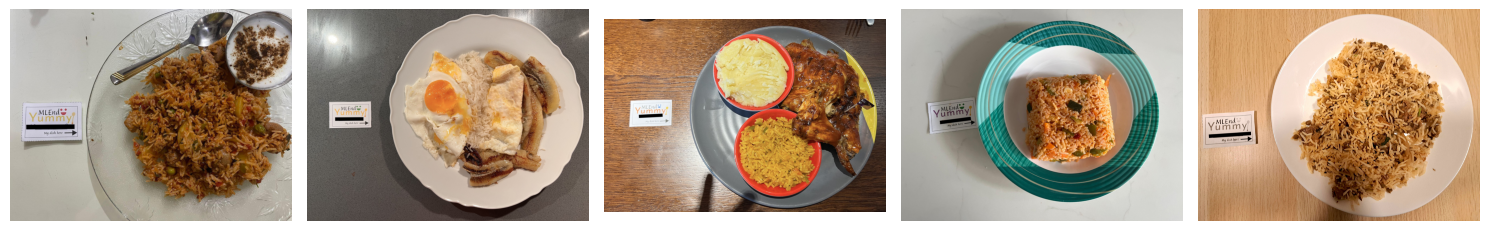

Chips


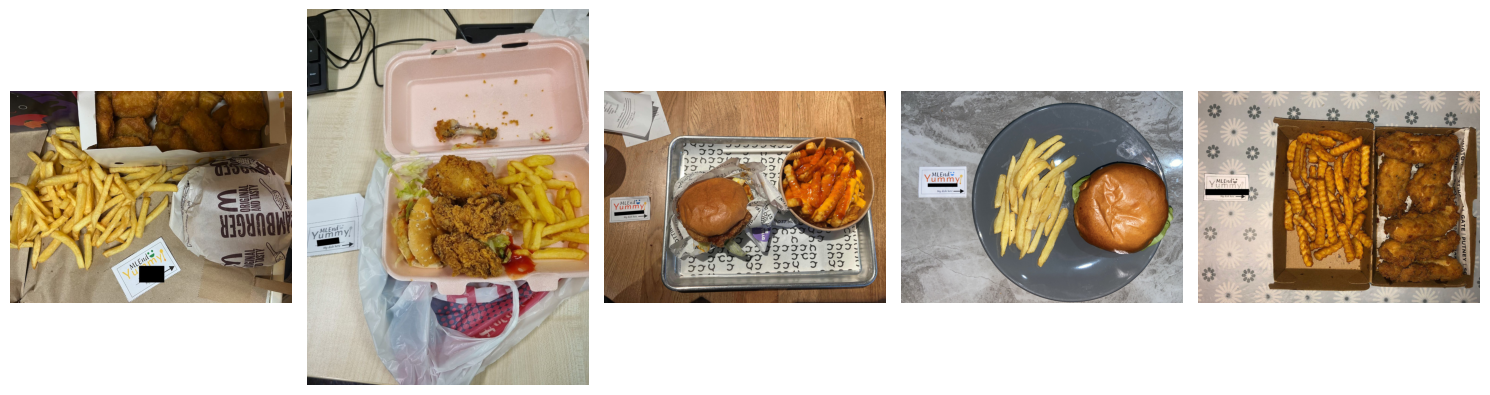

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# This method will show the raw data
def show_raw_data(X_train_paths):
  Chips_Img = np.array(X_train_paths)[Y_train==0]
  Rice_Img = np.array(X_train_paths)[Y_train==1]

  print('Rice')
  plt.figure(figsize=(15,5))
  for k,file in enumerate(Rice_Img[:5]):
    I = plt.imread(file)
    plt.subplot(1,5,k+1)
    plt.imshow(I)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

  print('Chips')
  plt.figure(figsize=(15,5))
  for k,file in enumerate(Chips_Img[:5]):
    I = plt.imread(file)
    plt.subplot(1,5,k+1)
    plt.imshow(I)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

show_raw_data(X_train_paths)

In [ ]:
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski
from PIL import Image

'''
This is a helper method that will make the image square ie 1:1 by adding some extra padding of black color.

Parameter: object of Image and value for padding
Return: new Image with padding in 1:1 aspect

'''
def make_it_square(I, pad=0):
  width, height = I.size
  size = max(width, height)
  new_image = Image.new('RGB', (size, size), (pad, pad, pad))
  new_image.paste(I, ((size - width) // 2, (size - height) // 2))
  return new_image

'''
This is a helper method that will resize the image into desired size.
This is important because the more the size, the more computational power would be
required so chosing the size of image that can best cater your problem statement is very important.

Parameter: object of Image and Size

Return: resized Image

'''
def resize_img(I,size=[100,100]):
  return I.resize((size[0], size[1]))


'''
This method takes paths of images for test and train and return the corresponding image data.

Parameter: X_train_paths and X_test_paths
Return: X_train, X_test

'''
def tranform(X_train_paths, X_test_paths):
  X_train = []
  for k,file in enumerate(X_train_paths):
    sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
    I = Image.open(file)
    I = make_it_square(I, pad=0)
    I = resize_img(I,size=[200,200])
    X_train.append(I)

  X_test = []
  for k,file in enumerate(X_test_paths):
    sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
    I = Image.open(file)
    I = make_it_square(I, pad=0)
    I = resize_img(I,size=[200,200])
    X_test.append(I)

  X_train = np.array(X_train)
  X_test = np.array(X_test)
  X_train.shape, X_test.shape

  return X_train, X_test

X_train, X_test = tranform(X_train_paths, X_test_paths)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


<ipython-input-22-006824ee7d58>:60: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
<ipython-input-22-006824ee7d58>:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
<ipython-input-22-006824ee7d58>:61: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); b

Let's plot a few images after resizing the images to 1:1

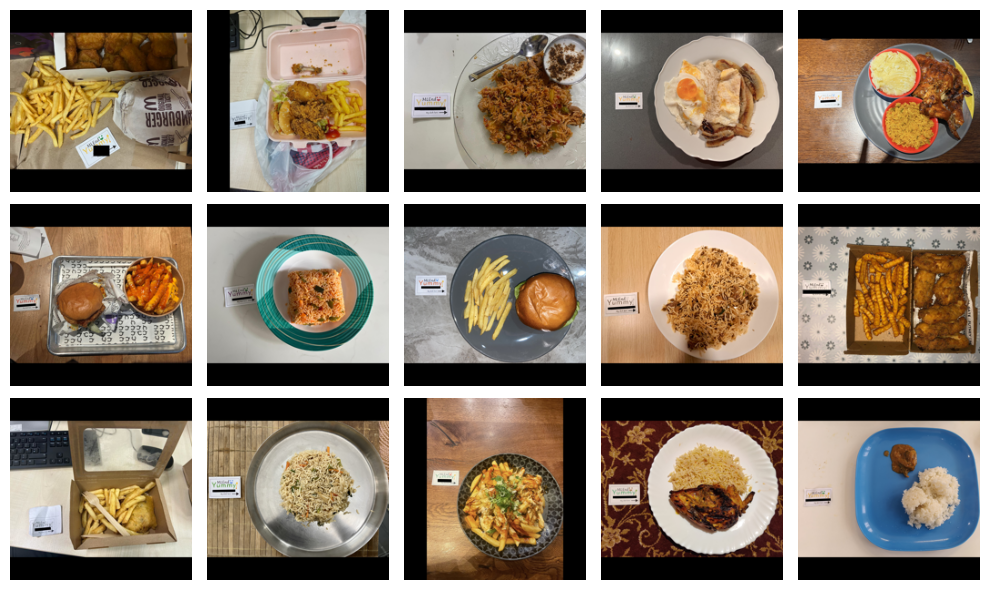

In [ ]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

Feature Extraction

In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

# Feature selection using Linear Binay Pattern
def LBR_features(I):
    Ig = (rgb2gray(I)*255).astype('uint8')
    lbp = ski.feature.local_binary_pattern(Ig, P=8, R=1, method = 'uniform')
    hist, _ = np.histogram(lbp, bins=np.arange(0, lbp.max() + 1), density=True)
    return hist

# Extracting the yellow feature from an Image
def get_yellow_component(I,t1=27, t2=33):
  I = np.array(I)
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

# Extracting the GLMC feature from an Image; Input: Image dataset; Output: dissimilarity and correlation feature
def GLMC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


# Helper function to show confusion matrix
def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()


'''
This method is used for extracting features from the image dataset for train and testing

Input: Image dataset for train and test
Output: Np Array Object that has features
'''
def extract_feature(X_train, X_test):
  X_train_f = []
  for k, I in enumerate(X_train):
    f0 = LBR_features(I)
    f1 = get_yellow_component(I)
    f2,f3 = GLMC_features(I)
    f0 = np.append(f0, [f1,f2,f3])
    X_train_f.append(f0.tolist())

  X_test_f = []
  for k, I in enumerate(X_test):
    f0 = LBR_features(I)
    f1 = get_yellow_component(I)
    f2,f3 = GLMC_features(I)
    f0 = np.append(f0, [f1,f2,f3])
    X_test_f.append(f0.tolist())

  return np.array(X_train_f), np.array(X_test_f)


x_train_feature, x_test_feature = extract_feature(X_train, X_test)

In [ ]:
display(x_train_feature)

array([[3.95750000e-02, 6.01500000e-02, 4.23000000e-02, 9.04000000e-02,
        1.65425000e-01, 9.61750000e-02, 5.05500000e-02, 6.06250000e-02,
        3.94800000e-01, 7.05500000e+03, 2.12755897e+01, 8.51826947e-01],
       [4.03250000e-02, 6.47500000e-02, 3.54750000e-02, 7.91750000e-02,
        1.53050000e-01, 1.02800000e-01, 4.92250000e-02, 6.80750000e-02,
        4.07125000e-01, 4.24700000e+03, 2.31843077e+01, 8.13875672e-01],
       [4.23750000e-02, 5.87000000e-02, 3.46250000e-02, 7.44500000e-02,
        1.12550000e-01, 1.08925000e-01, 5.39500000e-02, 6.85500000e-02,
        4.45875000e-01, 4.97600000e+03, 1.53329744e+01, 9.26896208e-01],
       [4.61000000e-02, 5.74000000e-02, 3.26250000e-02, 7.62250000e-02,
        1.20875000e-01, 1.01925000e-01, 4.91250000e-02, 7.11000000e-02,
        4.44625000e-01, 2.76000000e+02, 1.42475897e+01, 9.11965040e-01],
       [5.03250000e-02, 6.82750000e-02, 3.65750000e-02, 6.23250000e-02,
        1.16800000e-01, 7.48500000e-02, 4.52750000e-02, 6.48

In [ ]:
def standardisation(x_train_feature_, x_test_feature_):
  MEAN = x_train_feature_.mean(0)
  SD = x_train_feature_.std(0)

  X_train_fn = (x_train_feature_ - MEAN)/SD
  X_test_fn = (x_test_feature_ - MEAN)/SD
  return X_train_fn, X_test_fn

x_train_std, x_test_std = standardisation(x_train_feature, x_test_feature)

x_train_std, x_test_std

(array([[-2.39482545e-01,  5.02344789e-02,  6.18134567e-01,
          1.60653521e+00,  1.68713261e+00, -3.64674355e-01,
          7.69805980e-03, -7.59731869e-01, -8.88971820e-01,
          1.09806740e+00,  7.92881828e-01, -6.62601651e-01],
        [-1.72275096e-01,  5.39659659e-01, -1.27466113e-01,
          3.47128290e-01,  1.03680617e+00, -4.54337092e-02,
         -2.38507129e-01,  4.57940570e-01, -5.98395966e-01,
          1.72919294e-01,  1.19666966e+00, -1.41505376e+00],
        [ 1.14252664e-02, -1.04040850e-01, -2.20324806e-01,
         -1.83000681e-01, -1.09153494e+00,  2.49713303e-01,
          6.39469864e-01,  5.35577403e-01,  3.15179234e-01,
          4.13101976e-01, -4.64273946e-01,  8.25781095e-01],
        [ 3.45222266e-01, -2.42356661e-01, -4.38815848e-01,
          1.61482975e-02, -6.54042599e-01, -8.75975681e-02,
         -2.57088652e-01,  9.52364614e-01,  2.85709066e-01,
         -1.13540091e+00, -6.93886237e-01,  5.29743910e-01],
        [ 7.23824231e-01,  9.1470830

# 8 Results

**Using RandomForestClassifier (n_estimators=3, max_depth=3, random_state=42)**

- Training Accuracy:	 0.8142857142857143
- Test  Accuracy:	 0.6206896551724138

**Using RandomForestClassifier (n_estimators=5, max_depth=3, random_state=42)**

- Training Accuracy:	 0.8714285714285714
- Test  Accuracy:	 0.6551724137931034

**Using RandomForestClassifier (n_estimators=15, max_depth=3, random_state=42)**

- Training Accuracy:	 0.9142857142857143
- Test  Accuracy:	 0.7241379310344828

**Using RandomForestClassifier (n_estimators=50, max_depth=3, random_state=42)**

- Training Accuracy:	 0.9714285714285714
- Test  Accuracy:	 0.7586206896551724


**Using LinearSVC Model**
  
- Training Accuracy:	 0.8285714285714286
- Test  Accuracy:	 0.6896551724137931


Analysing the above result we can observe LinearSVC performed better with 12 image feature. The RandomForestClassifier needs to be tuned as we see the model is overfitted for high value of estimator. The performance will increase when using more number of dataset for training.  


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def trainRfModel(x_train_std, Y_train, n_estimators=5, max_depth=3, random_state=42):
  # Training model Random Forest Classifier using train dataset
  rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
  rf_classifier.fit(x_train_std, Y_train)
  return rf_classifier


def trainLinearSvc(x_train_std, Y_train):
  linearSvc = LinearSVC(C=1)
  linearSvc.fit(x_train_std, Y_train)
  return linearSvc


rfc = trainRfModel(x_train_std, Y_train)
linearSvc = trainLinearSvc(x_train_std, Y_train)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Evaluating the RandomForestClassifier model

rfc = trainRfModel(x_train_std, Y_train, n_estimators=3, max_depth=3, random_state=42)

print("********** RandomForestClassifier [n_estimators=3, max_depth=3, random_state=42] ************")
yt_p = rfc.predict(x_train_std)
ys_p = rfc.predict(x_test_std)

train_accuracy = np.mean(yt_p==Y_train)
test_accuracy  = np.mean(ys_p==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)
print('Confusion Matrix \n', confusion_matrix(Y_test, ys_p))

# Evaluating the RandomForestClassifier model

rfc = trainRfModel(x_train_std, Y_train, n_estimators=5, max_depth=3, random_state=42)

print("********** RandomForestClassifier [n_estimators=5, max_depth=3, random_state=42] ************")
yt_p = rfc.predict(x_train_std)
ys_p = rfc.predict(x_test_std)

train_accuracy = np.mean(yt_p==Y_train)
test_accuracy  = np.mean(ys_p==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)
print('Confusion Matrix \n', confusion_matrix(Y_test, ys_p))

rfc = trainRfModel(x_train_std, Y_train, n_estimators=15, max_depth=3, random_state=42)

print("********** RandomForestClassifier [n_estimators=15, max_depth=3, random_state=42] ************")
yt_p = rfc.predict(x_train_std)
ys_p = rfc.predict(x_test_std)

train_accuracy = np.mean(yt_p==Y_train)
test_accuracy  = np.mean(ys_p==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)
print('Confusion Matrix \n', confusion_matrix(Y_test, ys_p))

rfc = trainRfModel(x_train_std, Y_train, n_estimators=50, max_depth=3, random_state=42)

print("********** RandomForestClassifier [n_estimators=50, max_depth=3, random_state=42] ************")
yt_p = rfc.predict(x_train_std)
ys_p = rfc.predict(x_test_std)

train_accuracy = np.mean(yt_p==Y_train)
test_accuracy  = np.mean(ys_p==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)
print('Confusion Matrix \n', confusion_matrix(Y_test, ys_p))

# Evaluating the LinearSVC model

linearSvc = trainLinearSvc(x_train_std, Y_train)

print("********** LinearSVC ************")
yt_p = linearSvc.predict(x_train_std)
ys_p = linearSvc.predict(x_test_std)

train_accuracy = np.mean(yt_p==Y_train)
test_accuracy  = np.mean(ys_p==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)
print('Confusion Matrix \n', confusion_matrix(Y_test, ys_p))

********** RandomForestClassifier [n_estimators=3, max_depth=3, random_state=42] ************
Training Accuracy:	 0.8142857142857143
Test  Accuracy:	 0.6206896551724138
Confusion Matrix 
 [[10  4]
 [ 7  8]]
********** RandomForestClassifier [n_estimators=5, max_depth=3, random_state=42] ************
Training Accuracy:	 0.8714285714285714
Test  Accuracy:	 0.6551724137931034
Confusion Matrix 
 [[10  4]
 [ 6  9]]
********** RandomForestClassifier [n_estimators=15, max_depth=3, random_state=42] ************
Training Accuracy:	 0.9142857142857143
Test  Accuracy:	 0.7241379310344828
Confusion Matrix 
 [[10  4]
 [ 4 11]]
********** RandomForestClassifier [n_estimators=50, max_depth=3, random_state=42] ************
Training Accuracy:	 0.9714285714285714
Test  Accuracy:	 0.7586206896551724
Confusion Matrix 
 [[12  2]
 [ 5 10]]
********** LinearSVC ************
Training Accuracy:	 0.8285714285714286
Test  Accuracy:	 0.6896551724137931
Confusion Matrix 
 [[ 9  5]
 [ 4 11]]


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


<ipython-input-22-006824ee7d58>:60: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
<ipython-input-22-006824ee7d58>:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
<ipython-input-22-006824ee7d58>:61: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); b

Classification Report
              precision    recall  f1-score   support

       Chips       0.59      0.71      0.65        14
        Rice       0.67      0.53      0.59        15

    accuracy                           0.62        29
   macro avg       0.63      0.62      0.62        29
weighted avg       0.63      0.62      0.62        29

Confusion Matrix


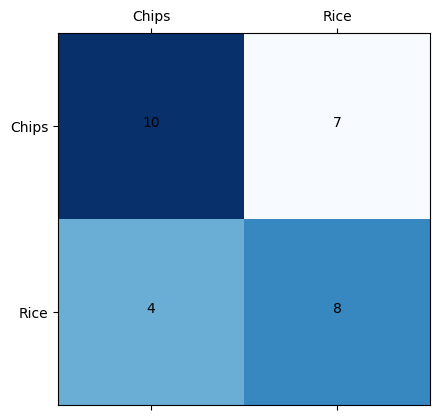

************************** Evaluate Model ************************** 
Accuracy is 0.6206896551724138, Precision is 0.6666666666666666, Recall is 0.5333333333333333, F1 Score is 0.5925925925925926


In [ ]:
import numpy as np
import spkit as sp
import matplotlib.pyplot as plt
from mlend import download_yummy_small, yummy_small_load
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

def evaluate_model(yt, yp):
  report = classification_report(yt, yp, target_names=['Chips', 'Rice'])
  print('Classification Report')
  print(report)

  confusion_met = confusion_matrix(yt, yp)
  print('Confusion Matrix')
  showConfMat(confusion_met)

  accuracy_sc = accuracy_score(yt, yp)
  precision_sc = precision_score(yt, yp)
  recall_sc = recall_score(yt, yp)
  f1_sc = f1_score(yt, yp)

  print('************************** Evaluate Model ************************** ')
  print('Accuracy is {}, Precision is {}, Recall is {}, F1 Score is {}'.format(accuracy_sc, precision_sc, recall_sc, f1_sc))


def ml_pipeline(X_train_paths, X_test_paths, y_train, y_test):

    # Step 1:- Image dataset creation and Pre-processing
    X_train, X_test = tranform(X_train_paths, X_test_paths)

    # Step 2:- Feature extraction
    x_train_feature, x_test_feature = extract_feature(X_train, X_test)

    # Step 3: Normalization/Standardisation
    x_train_std, x_test_std = standardisation(x_train_feature, x_test_feature)

    # Step 4:- Training Model
    rfc = trainRfModel(x_train_std, y_train, n_estimators=3, max_depth=3, random_state=42)

    # Stage 5: Model Testing and Evaluation
    ys_p = rfc.predict(x_test_std)
    evaluate_model(y_test, ys_p)



ml_pipeline(X_train_paths, X_test_paths, Y_train, Y_test)

# 9 Conclusions

The RandomForestClassifier needs tuning to match the accuracy as compare to LinearSVC. The LinearSVC with C=1 performs better predicts the training data and validation data with some difference which concludes that this model needs to be trained better. Increasing the number of dataset would surely help improve the performance of the model.